Scratch Jupyter Noteboook

In [1]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from matplotlib import cm
import nonlinear_approximator as na
%matplotlib inline
from importlib import reload

def reload_modules():
    modules = [
        na,
        na.activations,
        na.model,
        na.inference,
        na.params,
        na.training
    ]
    for mod in modules:
        reload(mod)

# Parameters

In [2]:
num_samples_train = 1000
num_samples_test = 1000

# XOR Function

In [3]:
def xor(x: NDArray) -> int:
    if x[0] >= 0:
        # First or Fourth Quadrants
        if x[1] >= 0:
            # First Quadrant
            return 0
        # Fourth Quadrant
        else:
            return 1

    # Second or Third Quadrants
    else:
        # Second Quadrant
        if x[1] >= 0:
            return 1

        # Fourth Quadrant
        else:
            return 0

# Instantiate Model 

In [4]:
reload_modules()
config = na.params.RegressionParams(
    width=1000,
    depth=50,
    input_dimension=2,
    transform_type=na.activations.TransformType.TENT,
    transform_params=na.params.TentParams(mu=1.99),
    output_dimension=1,
    storage_path='./xor_weights.hdf5',
    batch_size=1000
)

model = na.model.NonlinearRegressorModel(config)

Initializing HDF5 data store at  xor_weights_3436462017_.hdf5


# Neuron Preferred Directions

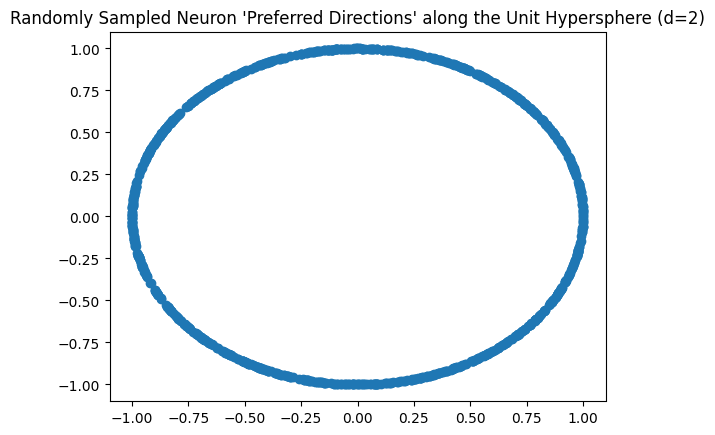

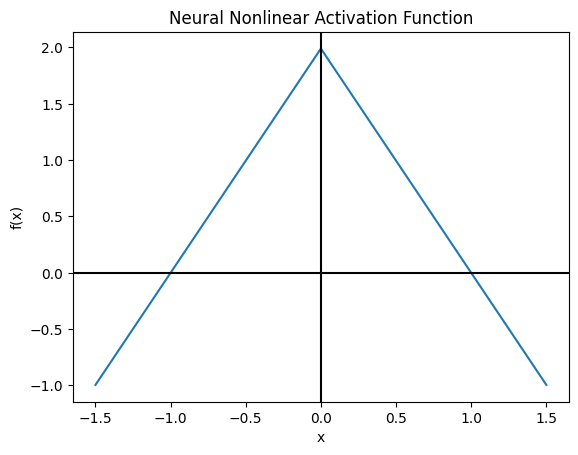

In [5]:

neurons = model.neurons
plt.scatter(neurons[0, :], neurons[1, :])
plt.title(
    "Randomly Sampled Neuron 'Preferred Directions' along the Unit Hypersphere (d=2)"
)
plt.show()

plt.title("Neural Nonlinear Activation Function")
xs = np.asarray(np.linspace(-1.5, 1.5, num=1000))
# plt.plot(xs, gauss(xs, alpha=nonlinear_params['alpha'], beta=nonlinear_params['beta']))
plt.plot(xs, na.activations.tent(xs, params=config.transform_params))

# plt.xlim([-1, 1])
# plt.ylim(-1,1)
plt.xlabel("x")
plt.axhline(0, c="k")
plt.axvline(0, c="k")
plt.ylabel("f(x)")
plt.show()

# Topological Mixing

/tmp/ipykernel_21161/3430885561.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("inferno", config.depth + 1)
/tmp/ipykernel_21161/3430885561.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


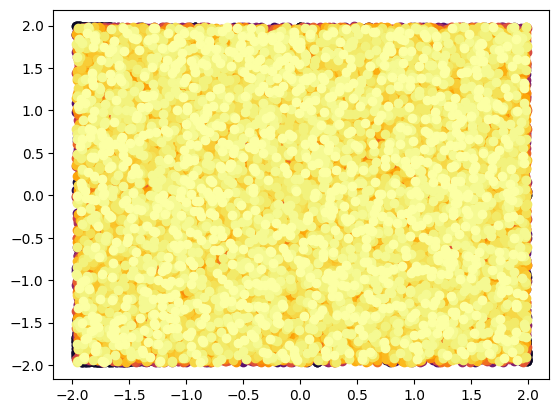

In [6]:
colors = cm.get_cmap("inferno", config.depth + 1)

reload_modules()
activations_identity = na.activations.compute_activations(
    neurons, np.asarray(np.eye(2)), config
)

plt.scatter(neurons[0, :], neurons[1, :], color="black")
for idx_layer in range(1, config.depth):
    plt.scatter(
        activations_identity[0, idx_layer, :],
        activations_identity[1, idx_layer, :],
        label=f"Pass {idx_layer + 1}",
        c=colors(idx_layer + 1),
    )

# plt.xlim([-1.25, 1.25])
# plt.ylim([-1.25, 1.25])
# plt.legend()
plt.show()

# Generate Samples Uniformly Distributed on Unit Disk, Train the Model

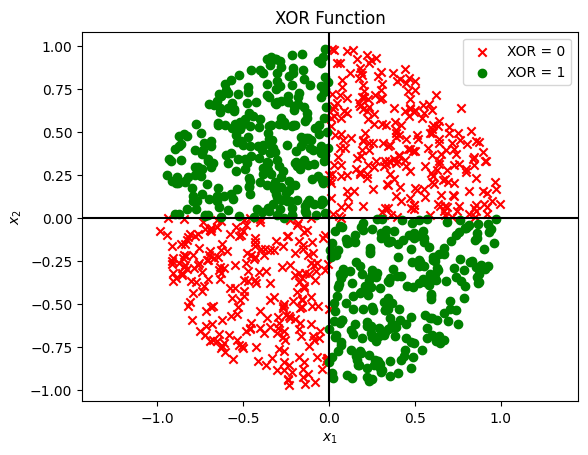

In [7]:

# Create  
test_samples = np.random.normal(
    loc=0, scale=1, size=(config.input_dimension, num_samples_test)
)
test_samples /= np.linalg.norm(test_samples, axis=0)
train_samples = np.random.normal(
    loc=0, scale=1, size=(config.input_dimension, num_samples_train)
)
train_samples /= np.linalg.norm(train_samples, axis=0)

# Scale by radii distributed according to d^th root (where d is dimension) to get uniform density
test_radii = np.random.uniform(0, 1, size=num_samples_test)
train_radii = np.random.uniform(0, 1, size=num_samples_train)
test_samples *= np.sqrt(test_radii)
train_samples *= np.sqrt(train_radii)

# Compute XOR, then use making to plot classification
xors_train = np.expand_dims(
    np.array([xor(train_samples[:, i]) for i in range(num_samples_train)]), axis=-1
)

mask_0 = (xors_train == 0).squeeze()
mask_1 = (xors_train == 1).squeeze()
plt.scatter(
    train_samples[0, mask_0],
    train_samples[1, mask_0],
    c="red",
    marker="x",
    label="XOR = 0",
)
plt.scatter(
    train_samples[0, mask_1],
    train_samples[1, mask_1],
    c="green",
    marker="o",
    label="XOR = 1",
)

plt.axis("equal")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")

plt.title("XOR Function")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

# Train an XOR Decoder

In [8]:
train_samples.shape, xors_train.shape

((2, 1000), (1000, 1))

In [9]:
reload_modules()
model = na.model.NonlinearRegressorModel(config)
model.fit(train_samples.T, xors_train)

Initializing HDF5 data store at  xor_weights_3436462017_.hdf5


Training on batches:   0%|          | 0/1.0 [00:00<?, ?it/s]

Decoders at slice (slice(0, 50, 1), slice(0, 1, 1), slice(0, 250, 1)) contained all NaN values. Initializing decoders...


Decoders at slice (slice(0, 50, 1), slice(0, 1, 1), slice(250, 500, 1)) contained all NaN values. Initializing decoders...


Decoders at slice (slice(0, 50, 1), slice(0, 1, 1), slice(500, 750, 1)) contained all NaN values. Initializing decoders...


Decoders at slice (slice(0, 50, 1), slice(0, 1, 1), slice(750, 1000, 1)) contained all NaN values. Initializing decoders...












































Training across neurons...: 100%|██████████| 4/4.0 [04:04<00:00, 61.02s/it]
Training on batches: 100%|██████████| 1/1.0 [04:04<00:00, 244.09s/it]


In [13]:
reload_modules()
model = na.model.NonlinearRegressorModel(config)

outputs = model.predict(train_samples.T)

#  (D x S) x (D x Y).T @ (D x S) ==> Y x
plt.hist(outputs, 20, density=True)
plt.title(f"Training Eval Output Probability Histogram N={len(xors_train)}")
plt.xlabel("P(XOR Evals to True)")
plt.show()

Initializing HDF5 data store at  xor_weights_3436462017_.hdf5
neuron chunk: (slice(0, 50, 1), slice(0, 1, 1), slice(0, 250, 1)); count_avg: 0
ACtS SHAPE: {acts.shape}, decoders shape: {decoders.shape}


IndexError: index 250 is out of bounds for axis 2 with size 250

In [ ]:
xor_thresh = 0.5

xors_train_rounded = outputs.copy().squeeze()
xors_train_rounded[xors_train_rounded <= xor_thresh] = 0
xors_train_rounded[xors_train_rounded > xor_thresh] = 1
xor_train_actual = np.array(
    [xor(train_samples[:, i]) for i in range(train_samples.shape[1])]
)


mask_0 = np.isclose(xors_train_rounded, 0).squeeze()
mask_1 = np.isclose(xors_train_rounded, 1).squeeze()
plt.scatter(
    train_samples[0, mask_0],
    train_samples[1, mask_0],
    c="red",
    marker="x",
    label="XOR = 0",
)
plt.scatter(
    train_samples[0, mask_1],
    train_samples[1, mask_1],
    c="green",
    marker="o",
    label="XOR = 1",
)

mask_incorrect = (xors_train_rounded != xor_train_actual).squeeze()
plt.scatter(
    train_samples[0, mask_incorrect],
    train_samples[1, mask_incorrect],
    marker="+",
    c="yellow",
)

plt.axis("equal")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")

plt.title(
    f"Network Approximation of XOR function  (Applied to Training Data)\nAccuracy = {100 * (1 - sum(mask_incorrect) / num_samples_train)}%"
)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()


# Test XOR Approximation

In [ ]:
outputs_test = model.predict(test_samples.T) 
#  (D x S) x (D x Y).T @ (D x S) ==> Y x
plt.hist(outputs_test, 20, density=True)
plt.title(f"Test Eval Output Probability Histogram N={test_samples.shape[1]}")
plt.xlabel("P(XOR Evals to True)")
plt.show()

In [ ]:
xor_thresh = 0.5

xors_test_rounded = outputs_test.copy().squeeze()
xors_test_rounded[xors_test_rounded <= xor_thresh] = 0
xors_test_rounded[xors_test_rounded > xor_thresh] = 1
xors_test_actual = np.array(
    [xor(test_samples[:, i]) for i in range(test_samples.shape[1])]
)


mask_0 = np.isclose(xors_test_rounded, 0).squeeze()
mask_1 = np.isclose(xors_test_rounded, 1).squeeze()
plt.scatter(
    test_samples[0, mask_0],
    test_samples[1, mask_0],
    c="red",
    marker="x",
    label="XOR = 0",
)
plt.scatter(
    test_samples[0, mask_1],
    test_samples[1, mask_1],
    c="green",
    marker="o",
    label="XOR = 1",
)

mask_incorrect = (xors_test_rounded != xors_test_actual).squeeze()
plt.scatter(
    test_samples[0, mask_incorrect],
    test_samples[1, mask_incorrect],
    marker="+",
    c="yellow",
)

plt.axis("equal")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")

plt.title(
    f"Network Approximation of XOR function  (Applied to Test Data)\nAccuracy = {100 * (1 - sum(mask_incorrect) / num_samples_train)}%"
)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()